In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [42]:
data=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0024-12.IAGE.nc')
plotvar = data.variables['IAGE'][0,:,:]
lont = data.variables['TLONG']
latt = data.variables['TLAT']

In [43]:
#259 # 南纬67.5度
#lont = lont[290,520:650]
#latt = latt[290,520:650]
lont = lont[259,450:650]
latt = latt[259,450:650]
plotvar = plotvar[:,259,450:650]
plotvar[plotvar == -1.0] = np.nan

In [44]:
latt

masked_array(data=[ -1.        ,  -1.        ,  -1.        ,  -1.        ,
                    -1.        ,  -1.        ,  -1.        ,  -1.        ,
                    -1.        ,  -1.        ,  -1.        ,  -1.        ,
                    -1.        ,  -1.        ,  -1.        ,  -1.        ,
                    -1.        ,  -1.        ,  -1.        ,  -1.        ,
                    -1.        ,  -1.        ,  -1.        ,  -1.        ,
                    -1.        ,  -1.        ,  -1.        ,  -1.        ,
                    -1.        ,  -1.        , -67.52705149, -67.52705149,
                   -67.52705149, -67.52705149, -67.52705149, -67.52705149,
                   -67.52705149, -67.52705149, -67.52705149, -67.52705149,
                   -67.52705149, -67.52705149, -67.52705149, -67.52705149,
                   -67.52705149, -67.52705149, -67.52705149, -67.52705149,
                   -67.52705149, -67.52705149, -67.52705149, -67.52705149,
                   -67.52

In [45]:
data1=nc.Dataset('/scratch/user/xiliangdiao/HF1850-1950/cmpr_B.E.13.BRCP85C5CN.ne120_t12.sehires38.003.sunway.CN_OFF.pop.h.2050-09.z_t.nc')
A = data1.variables['z_t'][:]/100

In [59]:
#A = np.arange(62)
B = np.arange(200)
xx, yy = np.meshgrid(B, A)
###############################################################
my_font = {'fontname':'Cambria', 'size':'13'}
nice_cmap=sns.diverging_palette(245, 15, n=11,as_cmap=True)
#nice_cmap=sns.diverging_palette(245, 10, n=10,as_cmap=True)
lev_cmap = nice_cmap([1,30,70,100,130,170,190,210,230,240]) 
new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
nice_levels = [-2,-1.6,-1.2,-0.8,-0.4,0,0.4,0.8,1.2,1.6,2]
nice_levels = [0,2,4,6,8,10,12,14,16,18]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)
#********************************************************************
### 130 white color

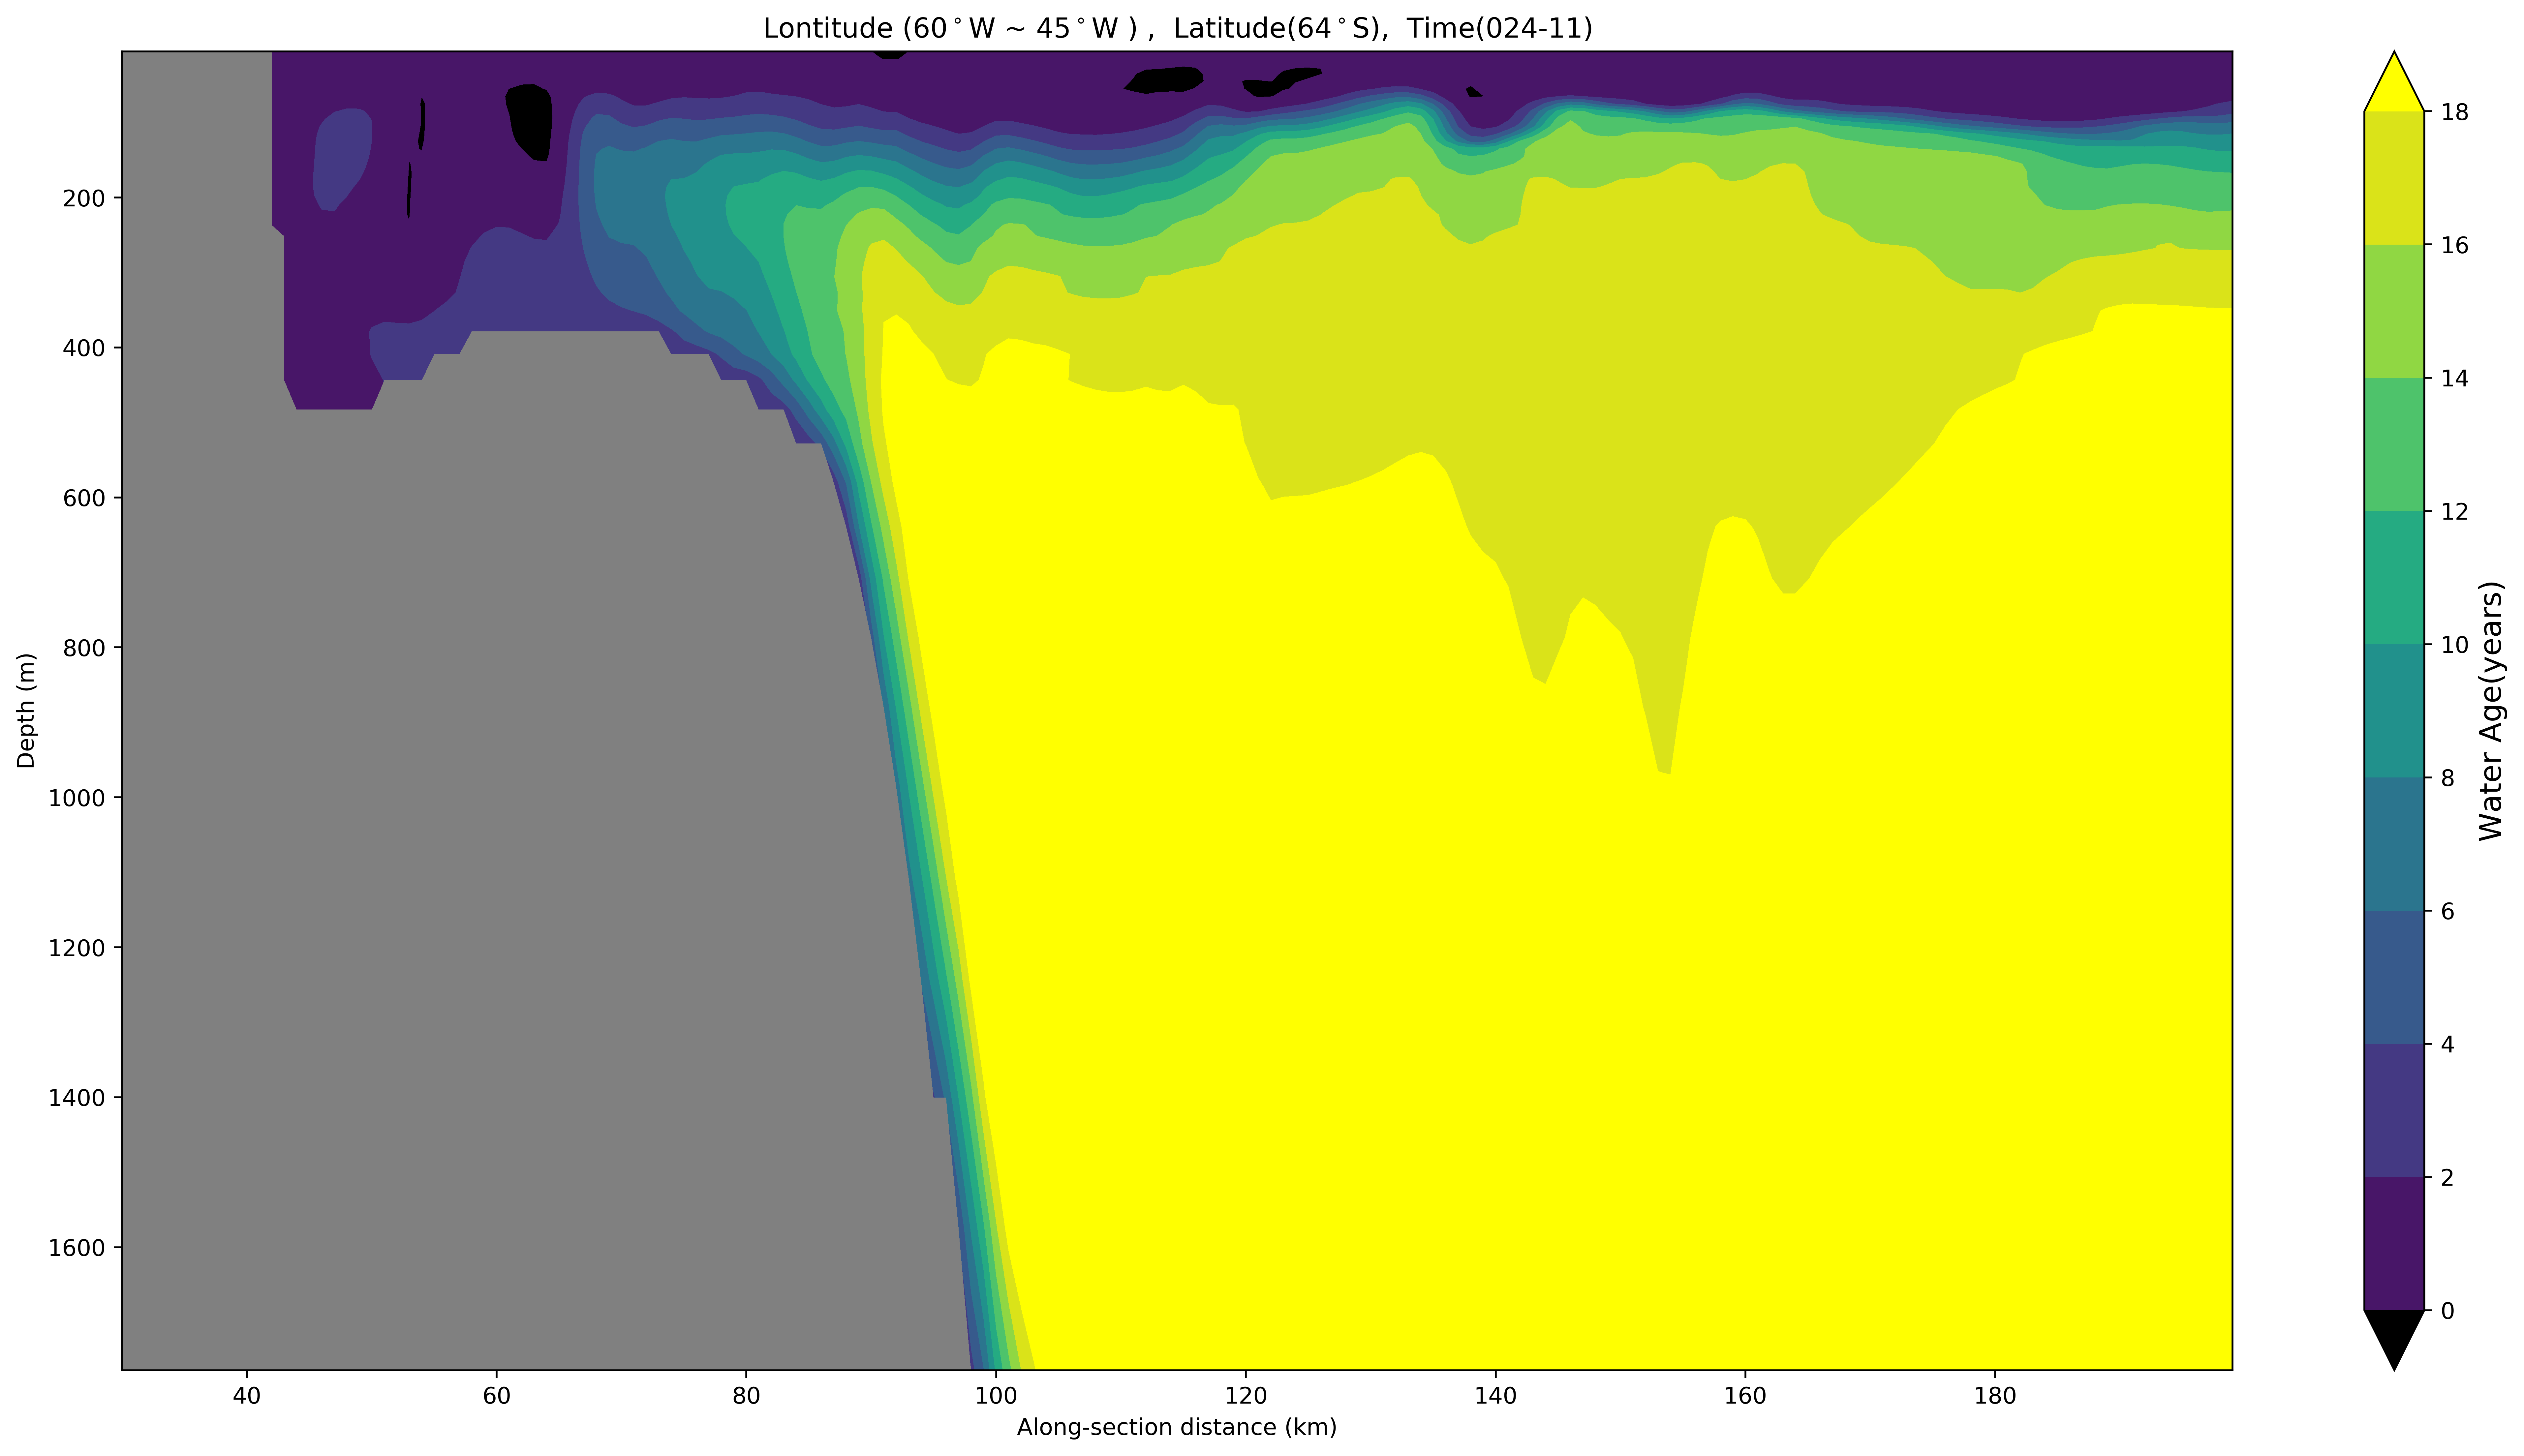

In [60]:
# plot the result
fig = plt.figure(figsize=(20, 10),dpi=500)
ax0 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
#im = ax0.contourf(xx, yy, plotvar,cmap=new_cmap,norm =norm,spacing = 'uniform',levels = nice_levels)
im = ax0.contourf(xx[:45,30:], yy[:45,30:], plotvar[:45,30:],levels = nice_levels,extend='both')
im.cmap.set_over('yellow')
im.cmap.set_under('black')
ax0.set_facecolor("grey")
cbar = fig.colorbar(im)
cbar.set_label('Water Age(years)', **my_font)
ax0.set_title('Mixed Layer Depth')
#############################################################################
##设定X坐标值
#plt.xticks(range(0,151,30), ['63$^\circ$W', '60$^\circ$W', '57$^\circ$W', '54$^\circ$W', '51$^\circ$W','48$^\circ$W'])
#plt.yticks(range(0,46,5), ['5', '55','105', '155', '210', '285','408','638','1106','1968'])#,'3133','4375','5625'])
plt.xlabel('Along-section distance (km)')
plt.ylabel('Depth (m)')
plt.gca().invert_yaxis()
ax0.set_title('Lontitude (60$^\circ$W ~ 45$^\circ$W ) ,  Latitude(64$^\circ$S),  Time(024-11)')
plt.savefig("ASCage.png",bbox_inches='tight',dpi=fig.dpi)

In [48]:
xx.shape

(62, 200)